In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score as acc
from sklearn.preprocessing import KBinsDiscretizer
from sklearn import tree

#prepare data
df = pd.read_csv("./GeoOrigin.txt", header = None, delimiter = ",")


In [2]:
df

,0,1,2,3,4,5,6,7,8,9,...,108,109,110,111,112,113,114,115,116,117
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-0.364194,-0.364194,-0.364194,-0.364194,-0.364194,-0.364194,-0.364194,-0.364194,-15.75,-47.95
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,0.936616,0.936616,0.936616,0.936616,0.936616,0.936616,0.936616,0.936616,14.91,-23.51
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,0.603755,0.603755,0.603755,0.603755,0.603755,0.603755,0.603755,0.603755,12.65,-8.00
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,0.187169,0.187169,0.187169,0.187169,0.187169,0.187169,0.187169,0.187169,9.03,38.74
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,1.620715,1.620715,1.620715,1.620715,1.620715,1.620715,1.620715,1.620715,34.03,-6.85
5,0.059217,0.034537,-0.703441,0.188652,-0.270353,1.420526,0.467766,0.209594,-0.496505,1.239908,...,2.176163,2.176163,2.176163,2.176163,2.176163,2.176163,2.176163,2.176163,12.65,-8.00
6,-0.280628,-0.310082,-0.756816,0.839033,-0.196670,1.153469,-0.473974,1.491603,-0.105328,1.365001,...,-0.447920,-0.447920,-0.447920,-0.447920,-0.447920,-0.447920,-0.447920,-0.447920,12.65,-8.00
7,-0.503840,-0.633080,-0.142764,-0.065937,0.259608,0.338967,-0.196791,1.638602,0.933850,0.415837,...,0.209632,0.209632,0.209632,0.209632,0.209632,0.209632,0.209632,0.209632,14.66,-17.41
8,0.358054,0.224749,-0.418566,0.010736,0.160657,-0.046321,-0.302215,0.534560,-0.561671,-0.335905,...,-0.703181,-0.703181,-0.703181,-0.703181,-0.703181,-0.703181,-0.703181,-0.703181,52.50,-0.12
9,-0.905772,-0.576675,-0.715466,-0.603780,0.247513,1.131966,-0.389026,0.129503,1.017126,1.191000,...,-0.198785,-0.198785,-0.198785,-0.198785,-0.198785,-0.198785,-0.198785,-0.198785,41.26,69.21


In [3]:
#Split data set
X = df.loc[:,:115]
y = df.loc[:,117]

In [4]:
#Fit all of the target values into two classes
y2 = []
for i in range(len(y)):
    if(abs(-0.118092 - y[i]) >= 90):
        y2.append(1)
    else:
        y2.append(0)

In [5]:
#Split in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.70, random_state=5) #70% training  30% test

In [6]:
#train random forest
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

#Predict probabilities
y_prob_pred = clf.predict_proba(X_test)

#Predict in all data
y_prob_pred = clf.predict_proba(X)

y_prob_pred2 = []
for i in range(len(y_prob_pred)):
    if(y_prob_pred[i][0] <= 5):
        y_prob_pred2.append(0)
    else:
        y_prob_pred2.append(1)

#Test
print("Accuracy:", acc(y_prob_pred2, y2))

Accuracy: 0.8215297450424929


In [7]:
#Create new dataset

#fit in bins
ds = []
bins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
yt = bins.fit_transform(y_prob_pred)  
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, yt, test_size=0.70, random_state=5) #70% training  30% test

In [8]:
#Generate tree for distillation
tree = tree.DecisionTreeClassifier()
tree.fit(X_train_new, y_train_new)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
#Predict from original dataset
y_pred_tree_fin2 = []
y_pred_tree_fin = tree.predict(X)
#Return bins to two classes
y_pred_tree2 = []
for i in range(len(y_pred_tree_fin)):
    if(y_pred_tree_fin[i][0] >= 5):
        y_pred_tree_fin2.append(0)
    else:
        y_pred_tree_fin2.append(1)

In [10]:
#Test
print("Accuracy:", acc(y_pred_tree_fin2, y2))

Accuracy: 0.8479697828139755


In [11]:
#Get scores
from sklearn import metrics
from sklearn.metrics import cohen_kappa_score, make_scorer
kappa_scorer = make_scorer(cohen_kappa_score)

print(metrics.classification_report(y2,y_pred_tree_fin2))
print(cohen_kappa_score(y2, y_pred_tree_fin2))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       870
           1       0.59      0.48      0.53       189

   micro avg       0.85      0.85      0.85      1059
   macro avg       0.74      0.70      0.72      1059
weighted avg       0.84      0.85      0.84      1059

0.4385256023947599


In [12]:
#Generate tree for normal training
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#Train with original data
tree2 = tree.DecisionTreeClassifier()
tree2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
#Predict from original dataset
y_pred_tree2 = tree2.predict(X)

In [14]:
#Test
print("Accuracy:", acc(y_pred_tree2, y2))
print(metrics.classification_report(y2,y_pred_tree2))
print("Kappa Score: ",cohen_kappa_score(y2, y_pred_tree2))

Accuracy: 0.8583569405099151
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       870
           1       0.61      0.59      0.60       189

   micro avg       0.86      0.86      0.86      1059
   macro avg       0.76      0.75      0.76      1059
weighted avg       0.86      0.86      0.86      1059

Kappa Score:  0.5129332548384723


([array([  8.,   0.,  17.,   0.,   0.,  25.,   0.,  15.,   0.,   0.,  21.,
           0.,  45.,   0.,   0.,  53.,   0.,  89.,   0.,   0., 210.,   0.,
         576.]),
  array([576.,   0., 210.,   0.,   0.,  89.,   0.,  53.,   0.,   0.,  45.,
           0.,  21.,   0.,   0.,  15.,   0.,  25.,   0.,   0.,  17.,   0.,
           8.])],
 array([0.        , 0.39130435, 0.7826087 , 1.17391304, 1.56521739,
        1.95652174, 2.34782609, 2.73913043, 3.13043478, 3.52173913,
        3.91304348, 4.30434783, 4.69565217, 5.08695652, 5.47826087,
        5.86956522, 6.26086957, 6.65217391, 7.04347826, 7.43478261,
        7.82608696, 8.2173913 , 8.60869565, 9.        ]),
 <a list of 2 Lists of Patches objects>)

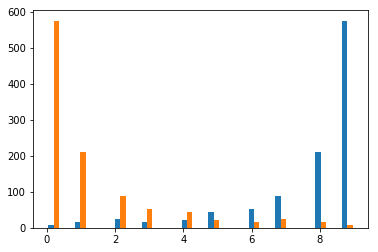

In [15]:
#Histogram of bins
import matplotlib.pyplot as plt
plt.hist(yt, bins='auto')